In [1]:
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score
from sklearn import neighbors
from sklearn.neighbors import (KNeighborsClassifier,NeighborhoodComponentsAnalysis)

import matplotlib.pyplot as plt

In [2]:
#Reading the csv file of dataset and its target
df_numeric = pd.read_csv('data_numeric_norm.csv')
df_target=pd.read_csv('data_target.csv')


# Dealing with imbalanced dataset

In [3]:
#Using SMOTE method to balance clases of dataset
y = df_target['TARGET'].astype('int')
X_balance,Y_balance = SMOTE().fit_sample(df_numeric,y)
X_balance = pd.DataFrame(X_balance, columns = df_numeric.columns)

# Splitting the data to train and test

In [4]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_balance, Y_balance, test_size=0.7, random_state=110
)
print("Sizes and class distributions for train/test data")
print("Shape train_data {}".format(X_train.shape))
print("Shape test_data {}".format(X_test.shape))
print(
    "Train data number of 0s {} and 1s {}".format(
        np.sum(y_train == 0), np.sum(y_train == 1)
    )
)
print(
    "Test data number of 0s {} and 1s {}".format(
        np.sum(y_test == 0), np.sum(y_test == 1)
    )
)

Sizes and class distributions for train/test data
Shape train_data (600, 38)
Shape test_data (1400, 38)
Train data number of 0s 299 and 1s 301
Test data number of 0s 701 and 1s 699


In [41]:
#Best n_neighbors
n_neighbors = 40

In [42]:
#for weights in ['uniform', 'distance'] we create an instances of Neighbours Classifiers and fit the data.
kncd = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
kncd.fit(X_train, y_train)

kncu = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
kncu.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [43]:
#Predict y value for kncd
y_pred_distance = kncd.predict(X_test)

#Predict y value for kncu
y_pred_uniform = kncu.predict(X_test)

In [44]:
#print classifier accuracy for y_pred_distance and y_pred_uniform
print("Accuracy with weights being distance:",metrics.accuracy_score(y_test, y_pred_distance))
print("Accuracy with weights being uniform:",metrics.accuracy_score(y_test, y_pred_uniform))

Accuracy with weights being distance: 0.5992857142857143
Accuracy with weights being uniform: 0.5785714285714286


In [45]:
#print the confusion matrix for y_pred_distance
conf_mat_distance=confusion_matrix(y_test,y_pred_distance)
print(conf_mat_distance)

[[391 310]
 [251 448]]


In [46]:
#print the confusion matrix for y_pred_uniform
conf_mat_uniform=confusion_matrix(y_test,y_pred_uniform)
print(conf_mat_uniform)

[[425 276]
 [314 385]]


In [47]:
#Get a report of some measurements for y_pred_distance
print(classification_report(y_test,y_pred_distance))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58       701
           1       0.59      0.64      0.61       699

    accuracy                           0.60      1400
   macro avg       0.60      0.60      0.60      1400
weighted avg       0.60      0.60      0.60      1400



In [48]:
#Get a report of some measurements for y_pred_uniform
print(classification_report(y_test,y_pred_uniform))

              precision    recall  f1-score   support

           0       0.58      0.61      0.59       701
           1       0.58      0.55      0.57       699

    accuracy                           0.58      1400
   macro avg       0.58      0.58      0.58      1400
weighted avg       0.58      0.58      0.58      1400



In [49]:
#Get the f1 score for y_pred_distance
f1_score(y_test, y_pred_distance, average='macro')

0.5986203661068783

In [50]:
#Get the f1 score for y_pred_uniform
f1_score(y_test, y_pred_uniform, average='macro')

0.5782271241830066

In [51]:
#print misclassification error rate for y_pred_distance
print("Misclassification error rate for weights being distance :",round(np.mean(y_pred_distance!=y_test),3))

Misclassification error rate for weights being distance : 0.401


In [52]:
#print misclassification error rate for y_pred_uniform
print("Misclassification error rate for weights being uniform :",round(np.mean(y_pred_uniform!=y_test),3))

Misclassification error rate for weights being uniform : 0.421


In [53]:
#Calculate AUC for y_pred_distance
test_predictions = y_pred_distance
test_predictions_class = ((test_predictions > 0.5) * 1).flatten()
test_df = pd.DataFrame(
    {
        "Predicted_score": test_predictions.flatten(),
        "Predicted_class": test_predictions_class,
        "True": y_test,
    }
)
roc_auc = metrics.roc_auc_score(y_test, y_pred_distance)
print("The AUC on test set:\n")
print(roc_auc)

The AUC on test set:

0.5993451007042871


In [54]:
#Calculate AUC for y_pred_uniform
test_predictions = y_pred_uniform
test_predictions_class = ((test_predictions > 0.5) * 1).flatten()
test_df = pd.DataFrame(
    {
        "Predicted_score": test_predictions.flatten(),
        "Predicted_class": test_predictions_class,
        "True": y_test,
    }
)
roc_auc = metrics.roc_auc_score(y_test, y_pred_uniform)
print("The AUC on test set:\n")
print(roc_auc)

The AUC on test set:

0.5785317929220264


In [55]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_uniform, average='macro')

0.5785317929220264

In [56]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_distance, average='macro')

0.5993451007042871

In [57]:
#Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_uniform, average='macro')

0.5787761602852938

In [58]:
#Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_distance, average='macro')

0.6000316458297372

# Choosing the best 'k' when it has lowest error rate

In [59]:
#Find error rate for all n_neighbors between 1 to 50
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean error rate')

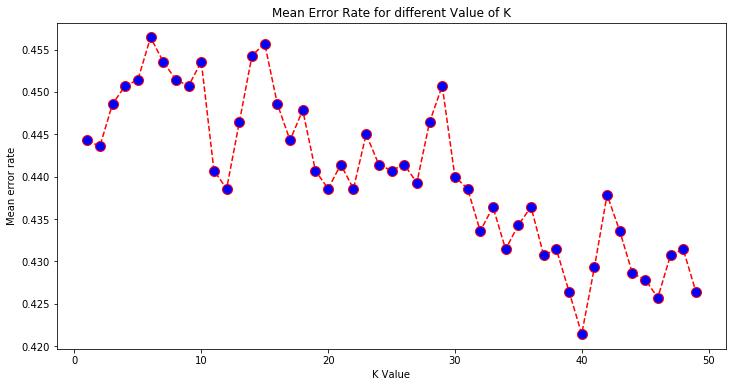

In [60]:
#Draw mean error rate with different value for n_neighbors 
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Mean Error Rate for different Value of K')
plt.xlabel('K Value')
plt.ylabel('Mean error rate')